In [95]:
import tempfile
import pandas as pd
pd.set_option('display.max_rows', 100)

import numpy as np
import os
from tqdm import tqdm
from glob import glob
from datetime import timedelta
import datetime

In [96]:
# Make a synthesized dataframe for ground truth

df_PSG = pd.DataFrame({
    'linetime': pd.date_range(start='2017-01-04 1:00:00', end = '2017-01-04 3:00:00', freq='30S')
})

"""
# Add labels wake:0/sleep:1
# Adding 2 sleep periods [1:30_1:50, 2:30_2:45]
"""

df_PSG ['w/s'] = 0

i = 60
j = 100
for c in range(i, j+1):
    df_PSG.at[c, 'w/s'] = 1
    
i = 180
j = 210
for c in range(i, j+1):
    df_PSG.at[c, 'w/s'] = 1
    
df_PSG.loc[99:103]

,linetime,w/s
99,2017-01-04 01:49:30,1
100,2017-01-04 01:50:00,1
101,2017-01-04 01:50:30,0
102,2017-01-04 01:51:00,0
103,2017-01-04 01:51:30,0


/Users/fatemeh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/fatemeh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/fatemeh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


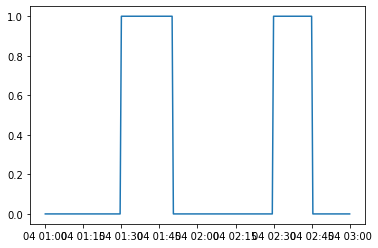

In [133]:
import matplotlib.pyplot as plt

plt.plot(df_PSG['linetime'], df_PSG['w/s'])

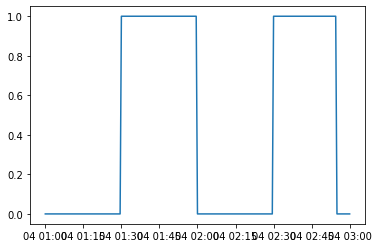

In [134]:
plt.plot(df['linetime'], df['sleep_boundary'])

# This Is The Function We Are Looking For

In [138]:
def sleep_boundary(df, col, epoch= 20):
    """
    df : the dataframe
    col: the signal column's name. eg 'sadeh'
    epoch: the number of epochs we want to wait untill make sure the wake event is happening
    
    Out put: this function add a new col entitled "sleep_boundary" to the dataframe
    """
    
    for i in range (len(df)):
    
        if (df.loc[i, col] == 1):
            df.at[i,'sleep_boundary']  = 1
            check = True
            cnt = 0
        
        if (df.loc[i, col] == 0):
        
            if(check == False):
                df.at[i,'sleep_boundary']  = 0
            
            if(check == True ):
                df.at[i,'sleep_boundary']  = 1
                cnt += 1
            
                if(cnt == epoch):
                    df.at[i,'sleep_boundary']  = 0
                    check = False
                
                

In [136]:
# # Find Sleep Boundary

# df = df_PSG
# col = 'w/s'

# epoch = 20
# df['sleep_boundary'] = 0

# for i in range (len(df)):
    
#     if (df.loc[i, col] == 1):
#         df.at[i,'sleep_boundary']  = 1
#         check = True
#         cnt = 0
        
#     if (df.loc[i, col] == 0):
        
#         if(check == False):
#             df.at[i,'sleep_boundary']  = 0
            
#         if(check == True ):
#             df.at[i,'sleep_boundary']  = 1
#             cnt += 1
            
#             if(cnt == epoch):
#                 df.at[i,'sleep_boundary']  = 0
#                 check = False
                
        
            
# df.loc[95:110]

,linetime,w/s,sleep_boundary
95,2017-01-04 01:47:30,1,1
96,2017-01-04 01:48:00,1,1
97,2017-01-04 01:48:30,1,1
98,2017-01-04 01:49:00,1,1
99,2017-01-04 01:49:30,1,1
100,2017-01-04 01:50:00,1,1
101,2017-01-04 01:50:30,0,1
102,2017-01-04 01:51:00,0,1
103,2017-01-04 01:51:30,0,1
104,2017-01-04 01:52:00,0,1


In [122]:
# # Find Sleep Boundary
# df = df_PSG
# col = 'w/s'

# epochs = 5
# df['sleep_boundary'] = 0

# for i in range(len(df)):
    
#     if (df.loc[i, col] == 1 ):
#         df.at[i,'sleep_boundary']  = 1
#         check = True
        
#     if (df.loc[i, col] == 0 ):
#         # in a loop check for 5 epochs behind it to be 0, if it is not put 1
#         if(check == True):
#             for j in range(i-1, i-epochs, -1):
#                 if(df.loc[j, col] == 1):
#                     df.at[i,'sleep_boundary']  = 1
#                     break;
#                 else:  
#                     continue;
#             df.at[i,'sleep_boundary']  = 0         
#             check = False        
# #             df.at[i,'sleep_boundary']  = 0 
# #             df.at[i,'sleep_boundary']  = 1  
            
#         else:
#             df.at[i,'sleep_boundary']  = 0 
#             check = False

KeyError: -1

In [90]:
# # Find Sleep Boundary
# df = df_PSG
# col = 'w/s'
# # threshold
# # epochs = 30
# epochs = 5
# # change the treshold to epochs


# # add new column to df
# df['sleep_boundary'] = 0
# change_state = True

# for i in range(len(df)):
    
#     if (df.loc[i, col] == 1 ):
#         change_state = False
#         df.at[i,'sleep_boundary']  = 1
# #         print("i in the main if", i) from 60_100 / 180_210 correct
        
#     if(df.loc[i, col] == 0 and change_state == True):
#         df.at[i,'sleep_boundary']  = 0
# #         print("i in the second if", i)
        
#     if(df.loc[i, col] == 0 and change_state == False):
#         wake = True #wait for a threshold window
#         for cnt in range(i, i+epochs): 
#             print("CNT", cnt)
#             if(df.loc[cnt, col] == 0):
#                 df.at[cnt,'sleep_boundary']  = 1
                
#             if(df.loc[cnt, col] == 1):
#                 wake = False
#                 i = cnt+1
#                 break;
#             if(cnt == (i+epochs)-1 and wake == True):
#                 print("cnt", cnt)
#                 print()
#                 change_state = True
#                 i = cnt+1
#                 break
                
# df.loc[100:140]

CNT 101
CNT 102
CNT 103
CNT 104
CNT 105
cnt 105

CNT 211
CNT 212
CNT 213
CNT 214
CNT 215
cnt 215



,linetime,w/s,sleep_boundary
100,2017-01-04 01:50:00,1,1
101,2017-01-04 01:50:30,0,1
102,2017-01-04 01:51:00,0,0
103,2017-01-04 01:51:30,0,0
104,2017-01-04 01:52:00,0,0
105,2017-01-04 01:52:30,0,0
106,2017-01-04 01:53:00,0,0
107,2017-01-04 01:53:30,0,0
108,2017-01-04 01:54:00,0,0
109,2017-01-04 01:54:30,0,0


# Sleep Boundary

In [50]:
# # Find Sleep Boundary
# df = df_PSG
# col = 'w/s'
# # threshold
# # epochs = 30
# epochs = 5
# # change the treshold to epochs


# # add new column to df
# df['sleep_boundary'] = 0
# change_state = True

# for i in range(len(df)):
    
#     if(df.loc[i, col] == 0 and change_state == True):
#         df.at[i,'sleep_boundary']  = 0
        
#     if (df.loc[i, col] == 1):
# #         print("i is", i)
#         change_state = False
#         df.at[i,'sleep_boundary']  = 1
        
#         # find the sequences of 1 
#         for j in range(i+1, len(df)):
#             if (df.loc[j, col] == 1):
#                 df.at[j,'sleep_boundary']  = 1
#             else:
#                 i = j
#                 break;
                
#     if (df.loc[i, col] == 0 and change_state == False):
        
#         for cnt in range(i, i+epochs):
# #             print("I ", i)
#             print("I + Epoch ", i+epochs)
#             print("CNT", cnt)
#             if (df.loc[cnt, col] != 0 ): # we should not change the state
#                 change_state = False
#                 break;
#             elif(df.loc[cnt, col] == 0 and cnt == (i + epochs)-1 ):
#                 print("IS ITS RUNNING????")
#                 change_state = True
#                 for temp in range(i, i+epochs): # initializing the threshold window before sleep offset
#                     df.at[i,'sleep_boundary']  = 1   
#                 i = i + epochs #update the main index to the after the threshold has been passed
#                 break;
                
#             elif(df.loc[cnt, col] == 0 and cnt < (i + epochs)-1): # change the state
#                 print("Am i stuck")
#                 print("")
#                 continue;
            
                
#         if (change_state == False): #keep the state as sleep
#             for temp in range(j, cnt+1):
#                 df.at[temp,'sleep_boundary']  = 1
#             i = cnt + 1# update the main index    
#     # check that for how long the o sequences are availabe. It should be more than the threshold to change the state of sleep


# # def sleep_boundary(signal, threshold = 5):
    
    

# #find sleep onset after 5 min sequences of data sleep onset

I + Epoch  106
CNT 101
Am i stuck

I + Epoch  106
CNT 102
Am i stuck

I + Epoch  106
CNT 103
Am i stuck

I + Epoch  106
CNT 104
Am i stuck

I + Epoch  106
CNT 105
IS ITS RUNNING????
I + Epoch  106
CNT 101
Am i stuck

I + Epoch  106
CNT 102
Am i stuck

I + Epoch  106
CNT 103
Am i stuck

I + Epoch  106
CNT 104
Am i stuck

I + Epoch  106
CNT 105
IS ITS RUNNING????
I + Epoch  106
CNT 101
Am i stuck

I + Epoch  106
CNT 102
Am i stuck

I + Epoch  106
CNT 103
Am i stuck

I + Epoch  106
CNT 104
Am i stuck

I + Epoch  106
CNT 105
IS ITS RUNNING????
I + Epoch  106
CNT 101
Am i stuck

I + Epoch  106
CNT 102
Am i stuck

I + Epoch  106
CNT 103
Am i stuck

I + Epoch  106
CNT 104
Am i stuck

I + Epoch  106
CNT 105
IS ITS RUNNING????
I + Epoch  106
CNT 101
Am i stuck

I + Epoch  106
CNT 102
Am i stuck

I + Epoch  106
CNT 103
Am i stuck

I + Epoch  106
CNT 104
Am i stuck

I + Epoch  106
CNT 105
IS ITS RUNNING????
I + Epoch  106
CNT 101
Am i stuck

I + Epoch  106
CNT 102
Am i stuck

I + Epoch  106
CNT 1


I + Epoch  216
CNT 214
Am i stuck

I + Epoch  216
CNT 215
IS ITS RUNNING????
I + Epoch  216
CNT 211
Am i stuck

I + Epoch  216
CNT 212
Am i stuck

I + Epoch  216
CNT 213
Am i stuck

I + Epoch  216
CNT 214
Am i stuck

I + Epoch  216
CNT 215
IS ITS RUNNING????
I + Epoch  216
CNT 211
Am i stuck

I + Epoch  216
CNT 212
Am i stuck

I + Epoch  216
CNT 213
Am i stuck

I + Epoch  216
CNT 214
Am i stuck

I + Epoch  216
CNT 215
IS ITS RUNNING????
I + Epoch  216
CNT 211
Am i stuck

I + Epoch  216
CNT 212
Am i stuck

I + Epoch  216
CNT 213
Am i stuck

I + Epoch  216
CNT 214
Am i stuck

I + Epoch  216
CNT 215
IS ITS RUNNING????
I + Epoch  216
CNT 211
Am i stuck

I + Epoch  216
CNT 212
Am i stuck

I + Epoch  216
CNT 213
Am i stuck

I + Epoch  216
CNT 214
Am i stuck

I + Epoch  216
CNT 215
IS ITS RUNNING????
I + Epoch  216
CNT 211
Am i stuck

I + Epoch  216
CNT 212
Am i stuck

I + Epoch  216
CNT 213
Am i stuck

I + Epoch  216
CNT 214
Am i stuck

I + Epoch  216
CNT 215
IS ITS RUNNING????
I + Epoch  2

In [3]:
# Make a synthesized dataframe for ML Model

df_ML = pd.DataFrame({
    'linetime': pd.date_range(start='2017-01-04 1:00:00', end = '2017-01-04 3:00:00', freq='30S')
})

"""
# Add labels wake:0/sleep:1
# detected sleep periods [1:15_1:40, 2:35_3:00]
"""

df_ML ['w/s'] = 0

i = 30
j = 80
for c in range(i, j+1):
    df_ML.at[c, 'w/s'] = 1
    
i = 190
j = 240
for c in range(i, j+1):
    df_ML.at[c, 'w/s'] = 1


# df_ML.loc[179:200]

In [4]:
# recall

# TP calculation
tp = 0
actual_true = 0

for i in range(len(df_PSG)):
        
    if(df_PSG.loc[i, 'w/s'] == 1):
        actual_true += 1
    if(df_PSG.loc[i, 'w/s'] and df_ML.loc[i, 'w/s']):
        tp += 1

if( actual_true != 0 ):
    recall = tp/actual_true
    
recall

0.5833333333333334

In [5]:
# precision

tp = 0
predicted_true = 0

for i in range(len(df_PSG)):
        
    if(df_ML.loc[i, 'w/s'] == 1):
        predicted_true += 1
    if(df_PSG.loc[i, 'w/s'] and df_ML.loc[i, 'w/s']):
        tp += 1
        
        
if( predicted_true != 0 ):
    precision = tp/predicted_true
    
precision

0.4117647058823529

In [6]:
# f1 score

if (precision + recall) > 0:
        f1 = (2. * precision * recall) / (precision + recall)
else:
        f1 = 0
f1

0.4827586206896552

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(df_PSG["w/s"], df_ML["w/s"]), recall_score(df_PSG["w/s"], df_ML["w/s"]), f1_score(df_PSG["w/s"], df_ML["w/s"])


(0.4117647058823529, 0.5833333333333334, 0.4827586206896552)